In [1]:
import os
import kagglehub
import zipfile
import shutil
import numpy as np

/Users/arr/miniconda3/envs/ds_base/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("blanderbuss/midi-classic-music")

print("Path to dataset files:", path)

Path to dataset files: /Users/arr/.cache/kagglehub/datasets/blanderbuss/midi-classic-music/versions/1


In [3]:
# List all files and directories in the downloaded dataset path
print("Files and directories in dataset path:")
for item in os.listdir(path):
    print(item)

Files and directories in dataset path:
Tchaikovsky Lake Of The Swans Act 1 6mov.mid
Arndt
Rothchild Symphony Rmw12 2mov.mid
Tchaicovsky Waltz of the Flowers.MID
Tchaikovsky Lake Of The Swans Act 2 14mov.mid
Tchaikovsky Lake Of The Swans Act 1 4mov.mid
Albe╠üniz
Tchaikovsky Lake Of The Swans Act 2 10mov.mid
Tchaikovsky Lake Of The Swans Act 1 2mov.mid
midiclassics
Tchaikovsky Lake Of The Swans Act 2 12mov.mid
Alkan
Rothchlid Symphony Rmw12 3mov.mid
Tchaikovsky Lake Of The Swans Act 1 7-8movs.mid
Sibelius Kuolema Vals op44.mid
Wagner Ride of the valkyries.mid
Tchaikovsky Lake Of The Swans Act 1 5mov.mid
Tchaikovsky Lake Of The Swans Act 1 9mov.mid
Tchaikovsky Lake Of The Swans Act 1 1mov.mid
Arensky
Tchaikovsky Lake Of The Swans Act 2 11mov.mid
Tchaikovsky Lake Of The Swans Act 2 13mov.mid
Tchaikovsky Lake Of The Swans Act 1 3mov.mid
Ambroise
midiclassics.zip


In [4]:
# here, we'll list the directories we have in the manually downloaded dataset in 'data/NN_midi_files_extended/dev'
directories = [d for d in os.listdir('data/NN_midi_files_extended/dev') if os.path.isdir(os.path.join('data/NN_midi_files_extended/dev', d))]
print("Directories in 'data/NN_midi_files_extended/dev':")
for d in directories:
    print(d)

Directories in 'data/NN_midi_files_extended/dev':
mozart
chopin
handel
byrd
schumann
mendelssohn
hummel
bach
bartok


In [5]:
zip_path = os.path.join(path, 'midiclassics.zip')
extract_path = os.path.join('data', 'kaggle', 'midiclassics')
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extracted files to:", extract_path)

Extracted files to: data/kaggle/midiclassics


In [6]:
print("Files and directories in extracted folder:")
for item in os.listdir(extract_path):
    print(item)

Files and directories in extracted folder:
Griffes
Mozart
Durand, E
Satie
Rothchild Piano Sonata Rmw13 2mov.mid
Liszt Bach Prelude Transcription.mid
Diabelli Sonatina op151 n1 2mov.mid
Liszt Paganini Etude n5.mid
Tchaikovsky Lake Of The Swans Act 1 6mov.mid
Arndt
Rothchild Symphony Rmw12 2mov.mid
Skriabin
Ginastera Estancia.mid
Bizet Carmen Prelude.mid
Rothchild Horn Concerto Rmw16 3mov.mid
Jakobowski
Chopin
Kuhlau Sonatina op55 n3 1mov.mid
Stravinski
Taube
Komzak
Lange
Mendelsonn
Tchaicovsky Waltz of the Flowers.MID
Reinecke Piano Concerto n3 1mov.mid
Katzwarra
Diabelli Sonatina op151 n2 1mov.mid
Vaughan
Diabelli Sonatina op151 n3 1mov.mid
Pachelbel
Coleridge-Taylor
Rossini
Czerny
Ravel
Buxethude Buxwv138 Prelude.mid
Finck
Durand, MA
Handel
Hiller
Rothchild Horn Concerto Rmw16 1mov.mid
Liszt Paganini Etude n3.mid
.DS_Store
Copland
Burgmuller
Liszt Paganini Etude n2.mid
Debussy Suite Bergamasque 2mov.mid
Tchaikovsky Lake Of The Swans Act 2 14mov.mid
MacBeth
Dvorak Symphony op70 n7 2mov

In [7]:
TARGET_COMPOSERS = [
    'Bach',
    'Beethoven',
    'Chopin',
    'Mozart',
]

In [8]:
# list files in extract_path that contain the target composers in name
for composer in TARGET_COMPOSERS:
    composer_files = [f for f in os.listdir(extract_path) if composer.lower() in f.lower()]
    print(f"Files for {composer}: {composer_files}")

Files for Bach: ['Liszt Bach Prelude Transcription.mid', 'Bach', 'C.P.E.Bach Solfeggieto.mid']
Files for Beethoven: ['Beethoven']
Files for Chopin: ['Chopin']
Files for Mozart: ['Mozart']


In [9]:
# Only keep directories that contain a target composer's name
for item in os.listdir(extract_path):
    item_path = os.path.join(extract_path, item)
    if not any(composer.lower() in item.lower() for composer in TARGET_COMPOSERS):
        if os.path.isfile(item_path):
            os.remove(item_path)
            print(f"Deleted file: {item_path}")
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
            print(f"Deleted directory: {item_path}")

Deleted directory: data/kaggle/midiclassics/Griffes
Deleted directory: data/kaggle/midiclassics/Durand, E
Deleted directory: data/kaggle/midiclassics/Satie
Deleted file: data/kaggle/midiclassics/Rothchild Piano Sonata Rmw13 2mov.mid
Deleted file: data/kaggle/midiclassics/Diabelli Sonatina op151 n1 2mov.mid
Deleted file: data/kaggle/midiclassics/Liszt Paganini Etude n5.mid
Deleted file: data/kaggle/midiclassics/Tchaikovsky Lake Of The Swans Act 1 6mov.mid
Deleted directory: data/kaggle/midiclassics/Arndt
Deleted file: data/kaggle/midiclassics/Rothchild Symphony Rmw12 2mov.mid
Deleted directory: data/kaggle/midiclassics/Skriabin
Deleted file: data/kaggle/midiclassics/Ginastera Estancia.mid
Deleted file: data/kaggle/midiclassics/Bizet Carmen Prelude.mid
Deleted file: data/kaggle/midiclassics/Rothchild Horn Concerto Rmw16 3mov.mid
Deleted directory: data/kaggle/midiclassics/Jakobowski
Deleted file: data/kaggle/midiclassics/Kuhlau Sonatina op55 n3 1mov.mid
Deleted directory: data/kaggle/mid

In [10]:
# also delete "C.P.E.Bach" files. This was the son of J.S. Bach, and we want to keep only the main composers
for item in os.listdir(extract_path):
    if 'C.P.E.Bach' in item:
        item_path = os.path.join(extract_path, item)
        if os.path.isfile(item_path):
            os.remove(item_path)
            print(f"Deleted file: {item_path}")
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
            print(f"Deleted directory: {item_path}")

Deleted file: data/kaggle/midiclassics/C.P.E.Bach Solfeggieto.mid


In [11]:
from music21 import midi, converter, instrument, note, chord
import matplotlib.pyplot as plt
import librosa.display

In [12]:
base_path = 'data/kaggle/midiclassics'
ave_maria_path = os.path.join(base_path, 'Bach', 'AveMaria.mid')

mf = midi.MidiFile()
mf.open(ave_maria_path)
mf.read()
mf.close()
s = midi.translate.midiFileToStream(mf)
s.show('midi')

In [13]:
midi_path = ave_maria_path
score = converter.parse(midi_path)

# Get metadata
print("Title:", score.metadata.title if score.metadata else "Unknown")
print("Composer:", score.metadata.composer if score.metadata else "Unknown")

for part in score.parts:
    instr = part.getInstrument()
    print("Instrument:", instr)

for element in score.recurse():
    if isinstance(element, note.Note):
        print(f"Note: {element.pitch}, Duration: {element.duration.quarterLength}")
    elif isinstance(element, chord.Chord):
        print(f"Chord: {element.pitches}, Duration: {element.duration.quarterLength}")

for el in score.recurse():
    if el.isClassOrSubclass('MetronomeMark'):
        print("Tempo:", el.number)
    if el.isClassOrSubclass('TimeSignature'):
        print("Time Signature:", el.ratioString)
    if el.isClassOrSubclass('KeySignature'):
        print("Key Signature:", el.sharps)

Title: None
Composer: None
Instrument: : 
Instrument: : 
Instrument: : 
Note: F3, Duration: 0.25
Note: A3, Duration: 0.25
Note: C4, Duration: 0.25
Note: F4, Duration: 0.25
Note: A4, Duration: 0.25
Note: C4, Duration: 0.25
Note: F4, Duration: 0.25
Note: A4, Duration: 0.25
Note: F3, Duration: 0.25
Note: A3, Duration: 0.25
Note: C4, Duration: 0.25
Note: F4, Duration: 0.25
Note: A4, Duration: 0.25
Note: C4, Duration: 0.25
Note: F4, Duration: 0.25
Note: A4, Duration: 0.25
Note: F3, Duration: 0.25
Note: G3, Duration: 0.25
Note: D4, Duration: 0.25
Note: G4, Duration: 0.25
Note: B-4, Duration: 0.25
Note: D4, Duration: 0.25
Note: G4, Duration: 0.25
Note: B-4, Duration: 0.25
Note: F3, Duration: 0.25
Note: G3, Duration: 0.25
Note: D4, Duration: 0.25
Note: G4, Duration: 0.25
Note: B-4, Duration: 0.25
Note: D4, Duration: 0.25
Note: G4, Duration: 0.25
Note: B-4, Duration: 0.25
Note: E3, Duration: 0.25
Note: G3, Duration: 0.25
Note: C4, Duration: 0.25
Note: G4, Duration: 0.25
Note: B-4, Duration: 0.2

/var/folders/hf/4xjln2lx2qjf5j4f0h6byy5h0000gn/T/ipykernel_62699/1175235068.py:19: Music21DeprecationWarning: ProtoM21Object.isClassOrSubclass was deprecated on v7 and will disappear at or after v10. use `someClass in .classSet`or for intersection: `not classSet.isdisjoint(classList)`
  if el.isClassOrSubclass('MetronomeMark'):


In [14]:
dir(score.metadata)

['_DOC_ATTR',
 '_DOC_ORDER',
 '__annotations__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activeSite',
 '_activeSiteStoredOffset',
 '_add',
 '_cache',
 '_classSetCacheDict',
 '_classTupleCacheDict',
 '_contents',
 '_contributorRoleToUniqueName',
 '_convertValue',
 '_deepcopySubclassable',
 '_derivation',
 '_duration',
 '_editorial',
 '_get',
 '_getActiveSite',
 '_getMeasureOffset',
 '_getPluralAttribute',
 '_getPriority',
 '_getSeconds',
 '_getSingularAttribute',
 '_getStringValueByNamespaceName',
 '_getStringValuesByNamespaceName',
 '_getTimeSignat

In [15]:
score = converter.parse(ave_maria_path)
notes = []
for element in score.recurse().notes:
    if isinstance(element, note.Note):
        notes.append(element.pitch.midi)
    elif isinstance(element, chord.Chord):
        notes.extend(p.midi for p in element.pitches)

In [16]:
notes

[53,
 57,
 60,
 65,
 69,
 60,
 65,
 69,
 53,
 57,
 60,
 65,
 69,
 60,
 65,
 69,
 53,
 55,
 62,
 67,
 70,
 62,
 67,
 70,
 53,
 55,
 62,
 67,
 70,
 62,
 67,
 70,
 52,
 55,
 60,
 67,
 70,
 60,
 67,
 70,
 52,
 55,
 60,
 67,
 70,
 60,
 67,
 70,
 53,
 57,
 60,
 65,
 69,
 60,
 65,
 69,
 53,
 57,
 60,
 65,
 69,
 60,
 65,
 69,
 53,
 57,
 60,
 65,
 53,
 57,
 60,
 65,
 53,
 57,
 60,
 65,
 53,
 57,
 60,
 65,
 53,
 55,
 58,
 62,
 53,
 55,
 58,
 62,
 53,
 55,
 58,
 62,
 53,
 55,
 58,
 62,
 52,
 55,
 58,
 60,
 52,
 55,
 58,
 60,
 52,
 55,
 58,
 60,
 52,
 55,
 58,
 60,
 53,
 57,
 60,
 65,
 53,
 57,
 60,
 65,
 53,
 57,
 60,
 65,
 60,
 53,
 57,
 60,
 65,
 53,
 57,
 62,
 65,
 53,
 57,
 62,
 65,
 53,
 57,
 62,
 65,
 53,
 57,
 62,
 65,
 53,
 55,
 59,
 62,
 53,
 55,
 59,
 62,
 53,
 55,
 59,
 62,
 53,
 55,
 59,
 62,
 52,
 55,
 60,
 64,
 52,
 55,
 60,
 64,
 52,
 55,
 60,
 64,
 52,
 55,
 60,
 64,
 52,
 53,
 57,
 60,
 52,
 53,
 57,
 60,
 52,
 53,
 57,
 60,
 52,
 53,
 57,
 60,
 50,
 53,
 57,
 60,
 50,
 53,
 57,


/Users/arr/miniconda3/envs/ds_base/lib/python3.12/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


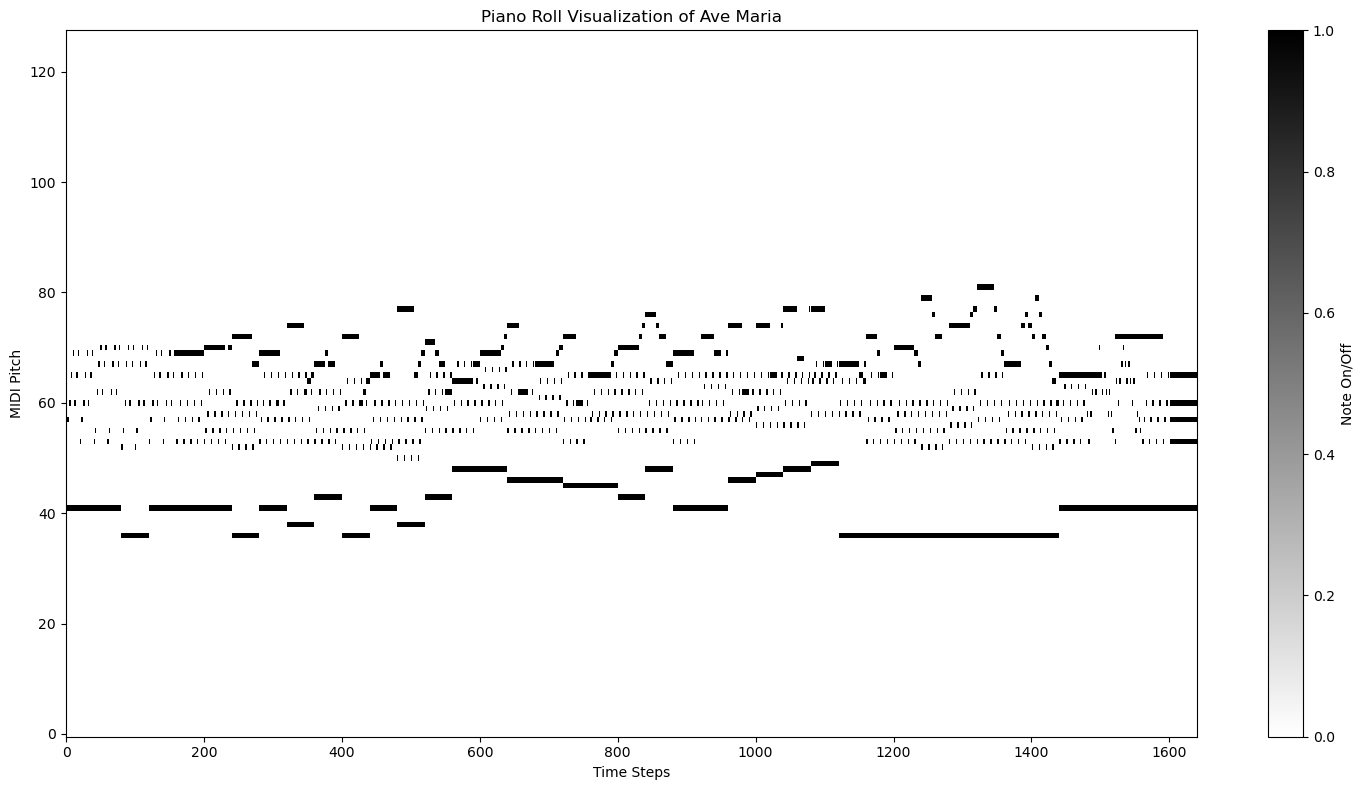

Piano roll shape: (128, 1641)
Total notes: 793


In [17]:
# Create a proper piano roll visualization
# First, get notes with their timing information
score = converter.parse(ave_maria_path)
notes_with_timing = []
for element in score.flat.notes:
    if isinstance(element, note.Note):
        notes_with_timing.append({
            'pitch': element.pitch.midi,
            'start': float(element.offset),
            'duration': float(element.duration.quarterLength)
        })
    elif isinstance(element, chord.Chord):
        for p in element.pitches:
            notes_with_timing.append({
                'pitch': p.midi,
                'start': float(element.offset),
                'duration': float(element.duration.quarterLength)
            })

# Create piano roll matrix
if notes_with_timing:
    max_time = max(n['start'] + n['duration'] for n in notes_with_timing)
    time_resolution = 0.1  # 10 time steps per quarter note
    time_steps = int(max_time / time_resolution) + 1
    
    # MIDI pitch range (typically 21-108 for piano, but we'll use 0-127)
    piano_roll = np.zeros((128, time_steps))
    
    for note_info in notes_with_timing:
        pitch = int(note_info['pitch'])
        start_step = int(note_info['start'] / time_resolution)
        duration_steps = int(note_info['duration'] / time_resolution)
        
        # Fill the piano roll
        for t in range(start_step, min(start_step + duration_steps, time_steps)):
            piano_roll[pitch, t] = 1
    
    # Visualize the piano roll
    plt.figure(figsize=(15, 8))
    plt.imshow(piano_roll, aspect='auto', cmap='gray_r', origin='lower', interpolation='nearest')
    plt.colorbar(label='Note On/Off')
    plt.title('Piano Roll Visualization of Ave Maria')
    plt.xlabel('Time Steps')
    plt.ylabel('MIDI Pitch')
    plt.tight_layout()
    plt.show()
    
    print(f"Piano roll shape: {piano_roll.shape}")
    print(f"Total notes: {len(notes_with_timing)}")
else:
    print("No notes found in the MIDI file")